#Importing libraries and setting some default settings

In [ ]:
! pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=5a621d730a51d6724eb7be0f37f1ce9f887852aef4321d7f844636e8678416c1
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import re,string 
import emoji

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#Analytics

## Length of Tweets

In [ ]:
data = pd.read_excel('./oxygen_related_COVID_tweets.xlsx')

In [ ]:
data.head()

,Unnamed: 0,text,label
0,0,@jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.,0.0
1,1,@fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up. #FordfailedOntario,-1.0
2,2,@arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.,-1.0
3,3,@CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can’t??,0.0
4,4,@NotHoodlum Or in a wheelchair....with Oxygen,0.0


In [ ]:
data.shape

(79799, 3)

In [ ]:
data[data['label'].isnull()]

,Unnamed: 0,text,label
73,73,"@bogipratomo Dospundi niki dok, kasus memuncak, UGD stag, ICU penuh, ventilator antri, pemakaman hingga tengah malam, woles2.. Kasus turun, vaksinasi jalan, bikin rumah sakit khusus.. 😔",NaN
97,97,"pastu trus buat cpr, oxygen semua . tkde respon jugak",NaN
121,121,@RobbieGmarc Skaffa en pulsoxymeter och ha koll på syresättning av blodet. Om syresättning av blodet sjunker snabbt ring ambulans. Det kan vara skillnaden mellan att hamna på intesiven eller infektionsavdelningen.,NaN
157,157,ଦେଶରେ ୧୦୦ ରୁ ମାତ୍ର ୧୫ ପ୍ରତିଶତ #OxygenCylinders Medical ରେ ଲାଗିଥାଏ ଆଉ ୮୫ ପ୍ରତିଶତ industrial ରେ ଏବେ ଯଦି industry କୁ ବନ୍ଦ କରି medical ରେ ଯୋଗେଇ ଦିଆଯାଏ ... #OxygenShortage ର ଅଭାବ ରହିବ ନାହିଁ...।।,NaN
168,168,"Ek bimari ne sabko oxygen ki keemat bta di... Thodi der oxygen dene wale cylinder lakho me bik rahe hai lekin muft me oxygen dene wale per-podho ki ham kadar nahi karte... हमारे पेड़ो का संरक्षण, हमारे भविष्य का संरक्षण🌳 https://t.co/i4T0DsVlWW",NaN
...,...,...,...
79794,79794,@msisodia ? Will You Utter A Word On #OxygenChorAAP MLA ??? Management Quota,NaN
79795,79795,"Hi,I'd really appreciate it if you would share or donate to this GoFundMe.Oxygen Life - Oxygen Langar*Join us in our initiative to save lives. India has a drastic shortage of oxygen supply due to COVID-19 global pandemic. We are coming together to pro… https://t.co/kA8nkdQmQT",NaN
79796,79796,Aap is doing black msrketing of oxygen।,NaN
79797,79797,"Hey there,I'm a social worker.I'm helping people in this covid situation.I'm providing people plazma and oxygen cyclinder in delhi hospitals.IF ANYBODY NEEDS HELP THEN CONTACT ME!!And any person wants to donate then contact me.@SonuSood @SoodFoundation @akshaykumar @PMOIndia",NaN


In [ ]:
data[data['label'].notnull()].shape

(315, 3)

In [ ]:
# Dropping the duplicate tweets
data.drop_duplicates(subset='text',inplace=True)

In [ ]:
# Tweets having unlabeled data
data[data['label'].isnull()]

,Unnamed: 0,text,label
73,73,"@bogipratomo Dospundi niki dok, kasus memuncak, UGD stag, ICU penuh, ventilator antri, pemakaman hingga tengah malam, woles2.. Kasus turun, vaksinasi jalan, bikin rumah sakit khusus.. 😔",NaN
97,97,"pastu trus buat cpr, oxygen semua . tkde respon jugak",NaN
121,121,@RobbieGmarc Skaffa en pulsoxymeter och ha koll på syresättning av blodet. Om syresättning av blodet sjunker snabbt ring ambulans. Det kan vara skillnaden mellan att hamna på intesiven eller infektionsavdelningen.,NaN
157,157,ଦେଶରେ ୧୦୦ ରୁ ମାତ୍ର ୧୫ ପ୍ରତିଶତ #OxygenCylinders Medical ରେ ଲାଗିଥାଏ ଆଉ ୮୫ ପ୍ରତିଶତ industrial ରେ ଏବେ ଯଦି industry କୁ ବନ୍ଦ କରି medical ରେ ଯୋଗେଇ ଦିଆଯାଏ ... #OxygenShortage ର ଅଭାବ ରହିବ ନାହିଁ...।।,NaN
168,168,"Ek bimari ne sabko oxygen ki keemat bta di... Thodi der oxygen dene wale cylinder lakho me bik rahe hai lekin muft me oxygen dene wale per-podho ki ham kadar nahi karte... हमारे पेड़ो का संरक्षण, हमारे भविष्य का संरक्षण🌳 https://t.co/i4T0DsVlWW",NaN
...,...,...,...
79601,79601,#SonuSood to import Oxygen Plant From France country to India to help COVID-19 Patients! @SonuSood 🙏🏻🇮🇳 https://t.co/cAdupbJb8o,NaN
79602,79602,Andhra Pradesh: 11 patients die as oxygen pressure drops in govt hospital in Tirupati https://t.co/RcnA9f1Wek via @indiatoday,NaN
79603,79603,"@dr_maheshsharma SOS!! Need help with oxygen bed at Kailash sec 27. Father also recovering from covid is retired govt officer from cabinet secretariat, resident of sec 20 and your supporter. Any help will be highly appreciated.",NaN
79606,79606,“We were not prepared for the second wave. We didn’t develop our infrastructure in terms of ICUs or oxygen generation plants or other health care resources.” I'm quoted in this article by The American Science Magazine Undark. #Oxygen @undarkmag @RuchiKumar https://t.co/Rzpqhs1pIS,NaN


In [ ]:
# Shape of label data
data[data['label'].notnull()].shape

(314, 3)

In [ ]:
# Function to text len of tweets
text_len = []
for text in data.text:
    tweet_len = len(str(text).split())
    text_len.append(tweet_len)
data['text_len'] = text_len

In [ ]:
data

,Unnamed: 0,text,label,text_len
0,0,@jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.,0.0,19
1,1,@fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up. #FordfailedOntario,-1.0,19
2,2,@arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.,-1.0,23
3,3,@CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can’t??,0.0,22
4,4,@NotHoodlum Or in a wheelchair....with Oxygen,0.0,6
...,...,...,...,...
79601,79601,#SonuSood to import Oxygen Plant From France country to India to help COVID-19 Patients! @SonuSood 🙏🏻🇮🇳 https://t.co/cAdupbJb8o,NaN,17
79602,79602,Andhra Pradesh: 11 patients die as oxygen pressure drops in govt hospital in Tirupati https://t.co/RcnA9f1Wek via @indiatoday,NaN,17
79603,79603,"@dr_maheshsharma SOS!! Need help with oxygen bed at Kailash sec 27. Father also recovering from covid is retired govt officer from cabinet secretariat, resident of sec 20 and your supporter. Any help will be highly appreciated.",NaN,36
79606,79606,“We were not prepared for the second wave. We didn’t develop our infrastructure in terms of ICUs or oxygen generation plants or other health care resources.” I'm quoted in this article by The American Science Magazine Undark. #Oxygen @undarkmag @RuchiKumar https://t.co/Rzpqhs1pIS,NaN,41


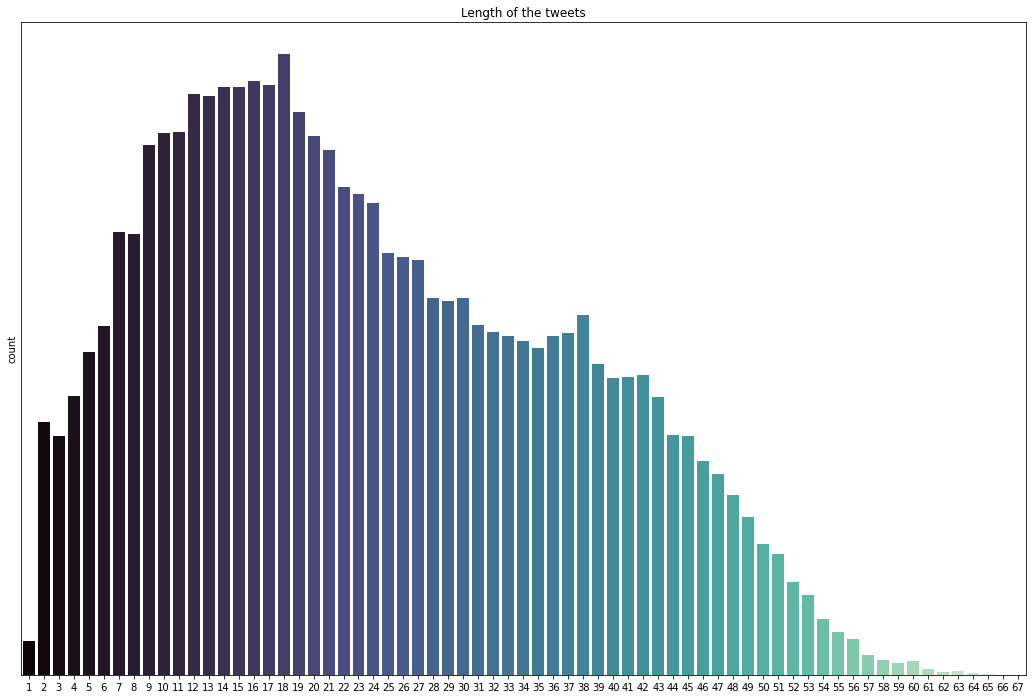

In [ ]:
# Plot to see the text length of different tweets
plt.figure(figsize=(18,12))
ax = sb.countplot(x='text_len', data=data, palette='mako')
plt.title('Length of the tweets')
plt.yticks([])
# ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()


In [ ]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji_pattern, r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
# Column containg the clean text
texts_new = []
for t in data.text:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(str(t)))))))
data['text_clean'] = texts_new

In [ ]:
# Length of clean text
text_len = []
for text in data.text_clean:
    tweet_len = len(str(text).split())
    text_len.append(tweet_len)
data['text_len1'] = text_len

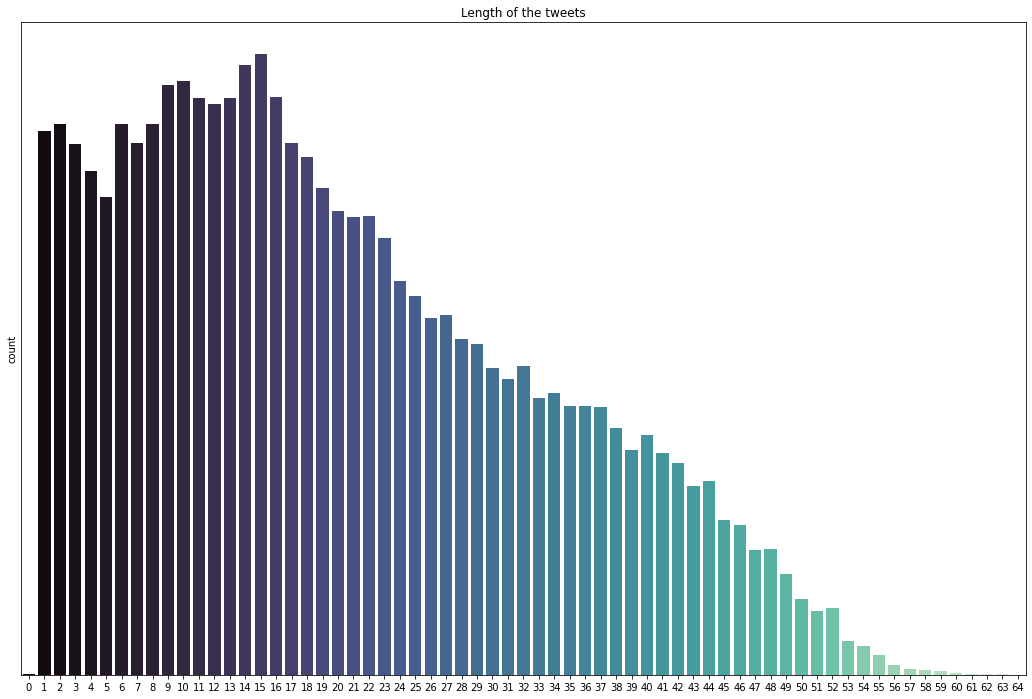

In [ ]:
# Plot of Length of tweets after cleaning
plt.figure(figsize=(18,12))
ax = sb.countplot(x='text_len1', data=data, palette='mako')
plt.title('Length of the tweets')
plt.yticks([])
# ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()


##WordCloud

It is the graph showing what are the major words used in the tweets.The size of the word are in accordance with the size of the word

###Most words present in all tweets

<function matplotlib.pyplot.show(*args, **kw)>

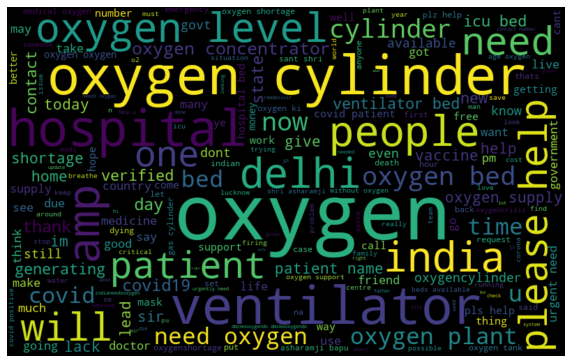

In [ ]:
all_words = ' '.join([text for text in data['text_clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

### Most words present in the help seeking tweets

<function matplotlib.pyplot.show(*args, **kw)>

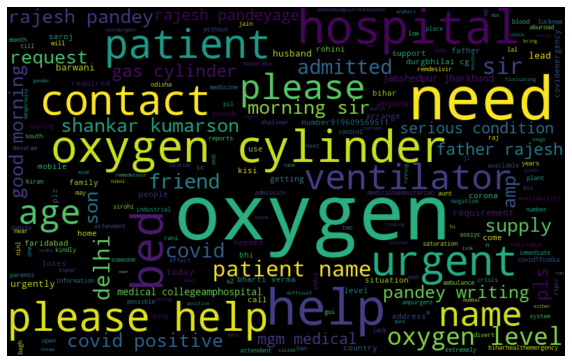

In [ ]:
need_help_words = ' '.join([text for text in data['text_clean'][data['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500,random_state=21,max_font_size=110).generate(need_help_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

### Most words present in the neutral tweets

<function matplotlib.pyplot.show(*args, **kw)>

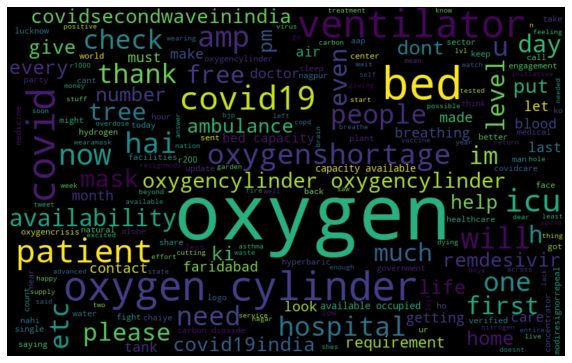

In [ ]:
neutral_help_words = ' '.join([text for text in data['text_clean'][data['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500,random_state=21,max_font_size=110).generate(neutral_help_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

### Most words used in tweets which are not help seeking

<function matplotlib.pyplot.show(*args, **kw)>

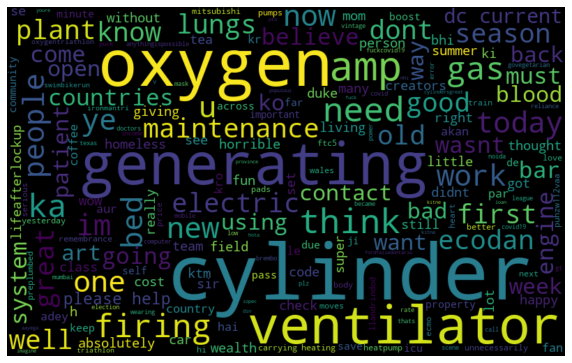

In [ ]:
dont_need_help_words = ' '.join([text for text in data['text_clean'][data['label']==-1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500,random_state=21,max_font_size=110).generate(dont_need_help_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

##Most used hashtags in tweets

In [ ]:
data[data['label']==1].head()

,Unnamed: 0,text,label,text_len,text_clean,text_len1
5,5,@inllewyndavis @moonflovers I don't think either one of them are getting enough oxygen. Their mouths are wide open. Just bring a oxygen tank with you.,1.0,25,i dont think either one of them are getting enough oxygen their mouths are wide open just bring a oxygen tank with you,23
46,46,Get the man some oxygen! @zachzubia,1.0,6,get the man some oxygen,5
142,142,My father's oxygen levels are dangerously low. Can anyone plz help arrange a bed in South Delhi.@TajinderBagga @KapilMishra_IND @indiantweeter,1.0,19,my fathers oxygen levels are dangerously low can anyone plz help arrange a bed in south delhi,17
155,155,"@SonuSood please sir if possible help her sir she is my friend and is asking for help of bed and 2 oxygen cylinder for her brother who is a Corona Patient her contact no. Are given in the image sir. Her name is Nidhi and She is from Nikol, Ahmedabad,Gujarat.#SonuSood #COVIDurgent https://t.co/D6h3J4Lqw1",1.0,52,please sir if possible help her sir she is my friend and is asking for help of bed and 2 oxygen cylinder for her brother who is a corona patient her contact no are given in the image sir her name is nidhi and she is from nikol ahmedabadgujaratsonusood covidurgent,50
267,267,@DCPNWestDelhi URGENT SOS. Sir two out of three patients are running low on oxygen now n their son who himself is positive have to run for getting his parents admitted to any hospital. They are finding it extremely difficult to get two beds. Called up 100 n ambulance but no help,1.0,51,urgent sos sir two out of three patients are running low on oxygen now n their son who himself is positive have to run for getting his parents admitted to any hospital they are finding it extremely difficult to get two beds called up 100 n ambulance but no help,50


In [ ]:

def hashtags_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)",str(i))
    hashtags = hashtags+ht
  return hashtags

In [ ]:
# extracting hashtags from help seeking tweets 
help_positive = hashtags_extract(data['text'][data['label'] == 1].values) 
# extracting hashtags from not help seeking tweets 
help_negative = hashtags_extract(data['text'] [data['label'] == -1].values) 
# extracting hashtags from neutral help seeking tweets 
help_neutral = hashtags_extract(data['text'] [data['label'] == 0].values) 
# extracting all hashtags from all the tweets 
all = hashtags_extract(data['text'].values)

In [ ]:
import nltk
import seaborn as sns

### All tweets

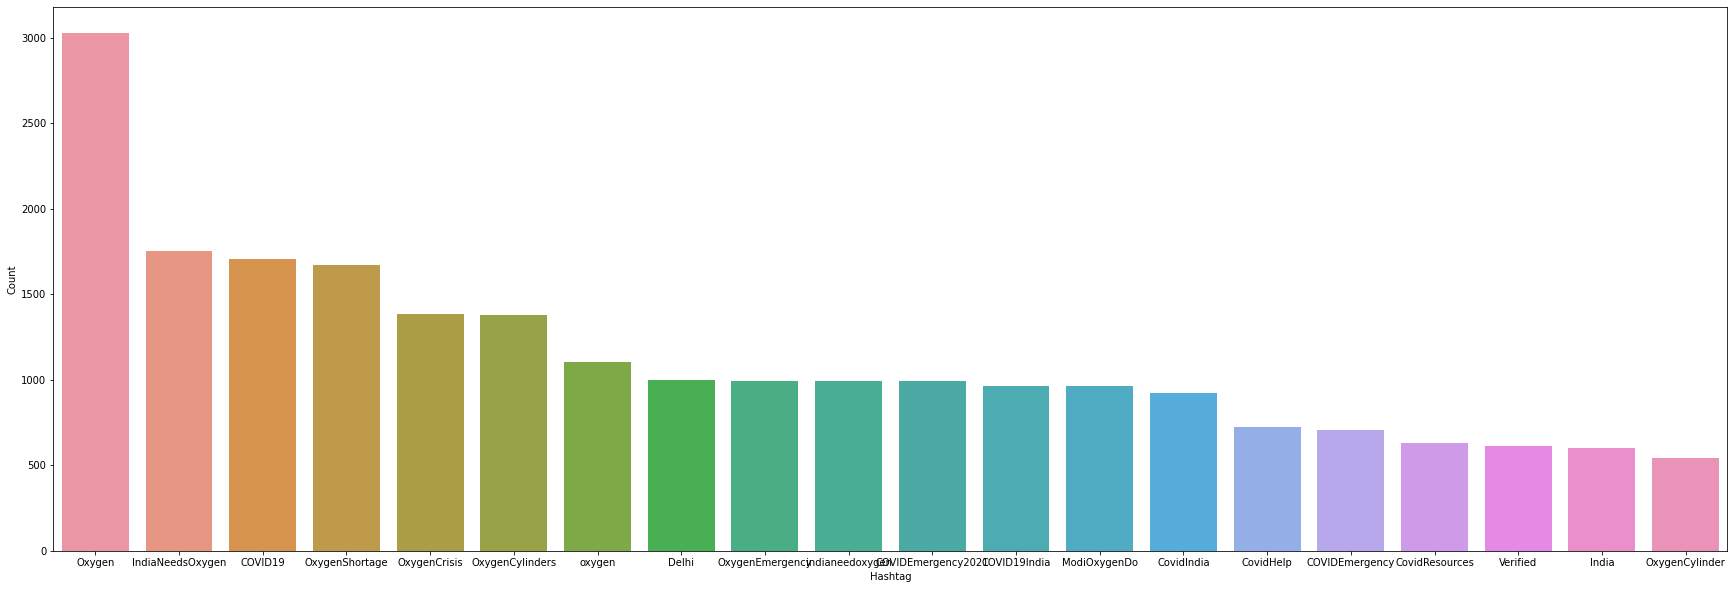

In [ ]:
a = nltk.FreqDist(all) 
d = pd.DataFrame({ 'Hashtag': list (a.keys()),'Count': list (a.values())})

#selecting top 20 most frequent hashtags
d = d.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(30,10)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

### Not help seeking tweets

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s

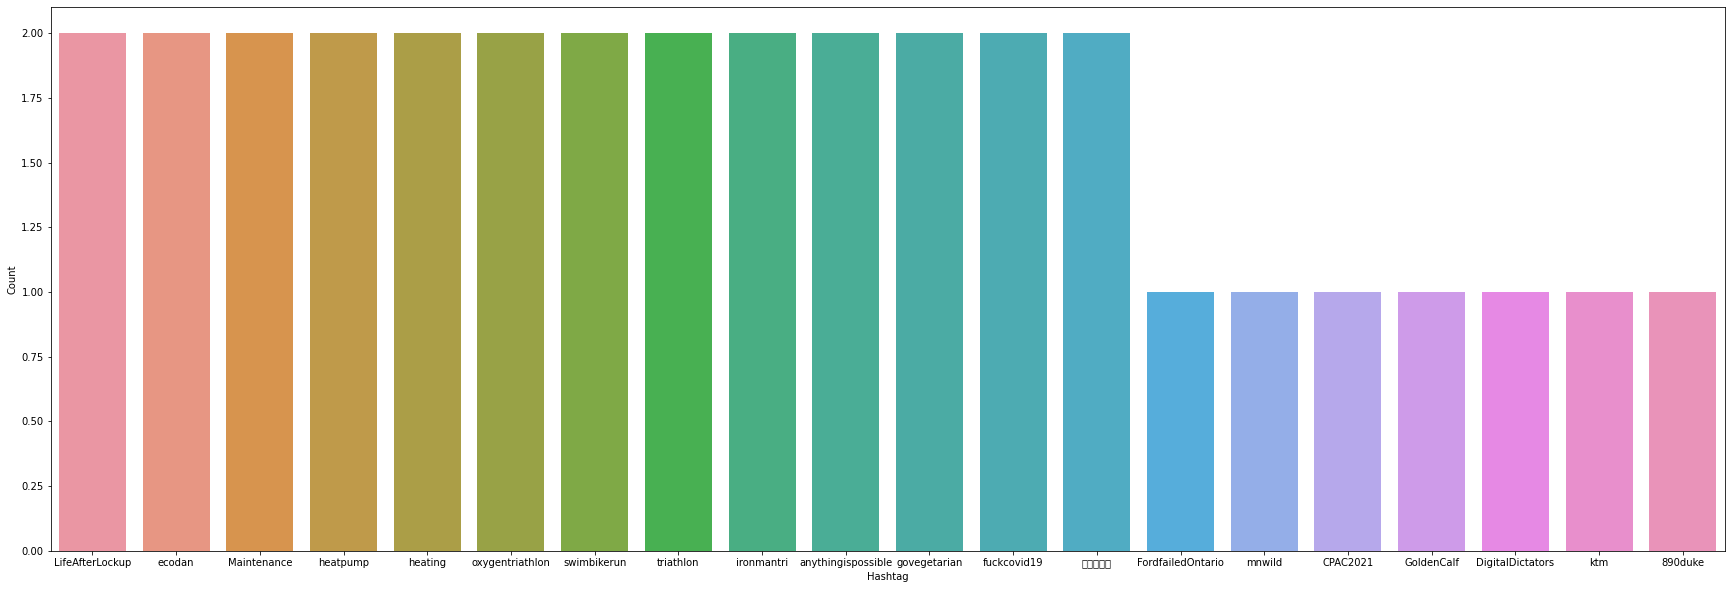

In [ ]:
b = nltk.FreqDist(help_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(30,10)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

### Help seeking tweets

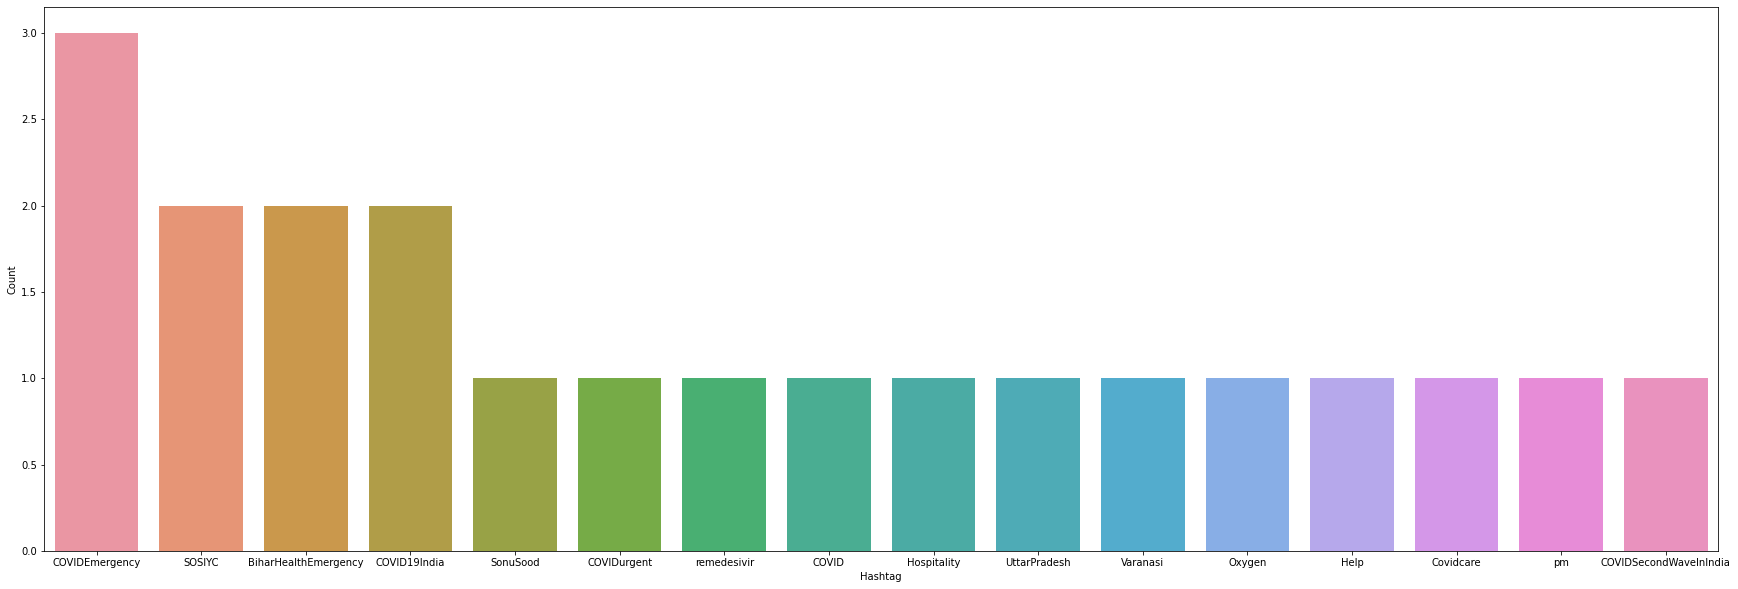

In [ ]:
h = nltk.FreqDist(help_positive) 
f = pd.DataFrame({'Hashtag': list(h.keys()), 'Count': list(h.values())}) 
# selecting top 20 most frequent hashtags 
f = f.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(30,10)) 
ax = sns.barplot(data=f, x= "Hashtag", y = "Count")

### Neutral tweets

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2321 missing from current font.
  font.set_text(s, 0, flags=flags)


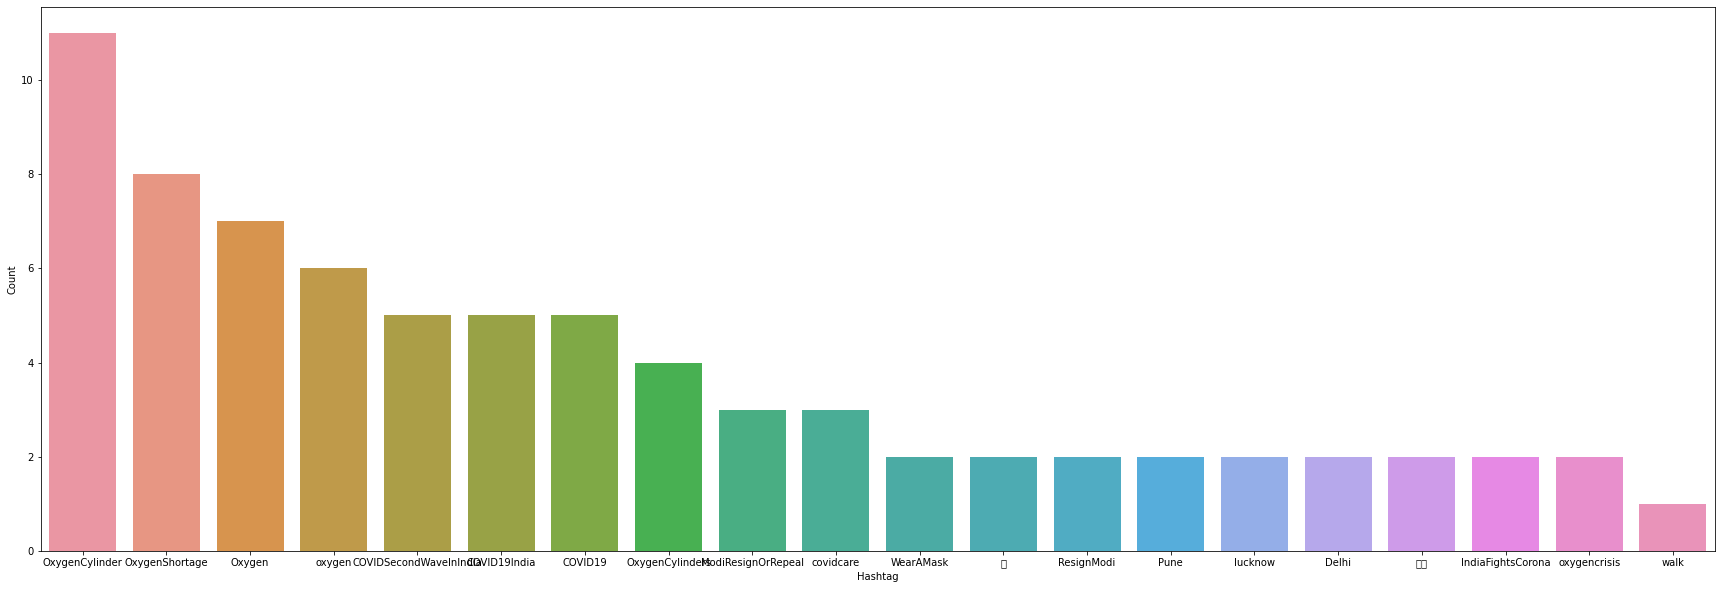

In [ ]:
j = nltk.FreqDist(help_neutral) 
g = pd.DataFrame({'Hashtag': list(j.keys()), 'Count': list(j.values())}) 
# selecting top 20 most frequent hashtags 
g = g.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(30,10)) 
ax = sns.barplot(data=g, x= "Hashtag", y = "Count")

## Most used language in tweets

In [ ]:
!pip install spacy_langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993429 sha256=8f5e561f9f2e9f6e18d1c0b8583e1f85cf30f44916eed258ed2508ab365dc206
  Stored in directory: /root/.cache/pip/wheels/c1/6d/ab/bf9ecd1ab14dd236da586dfd0d4b008e2e803e571cf2229c26
Successfully built langdetect


In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!spacy download en_core_web_md
# python -m spacy link en_core_web_md en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-19 17:48:21.053218: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [47]:
!spacy link en_core_web_md en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-19 18:27:34.883433: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, model symlinks are not supported anymore. You can
load trained pipeline packages using their full names or from a directory
path.


In [ ]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [ ]:
# Function to find the major language used in tweets

major_lang = []
for text in data['text_clean'].values :
  lang = nlp(str(text))
  # detect_language = lang._.language
  major_lang.append(lang._.language)
# data = major_lang

In [37]:
major_lang[1]['language']

'en'

In [40]:
data['major_lang'] = major_lang

In [42]:
data['major_lang'] = data["major_lang"].apply(lambda x   : x['language'])

In [43]:
data

,Unnamed: 0,text,label,text_len,text_clean,text_len1,major_lang
0,0,@jackmathers4 @JaniceDean How about the vaccines? Ventilators? At least President Trump was able to get a stimulus check out.,0.0,19,how about the vaccines ventilators at least president trump was able to get a stimulus check out,17,en
1,1,@fordnation Imagine the most populous province wasn't? All cylinders...great. Now we know you're going to fuck this up. #FordfailedOntario,-1.0,19,imagine the most populous province wasnt all cylindersgreat now we know youre going to fuck this up fordfailedontario,18,en
2,2,@arunbajpairajan Ye bhi nhi pta hota ki iopec countries ka loan kitna h. Cylinder kitne din me aayega. Ye sab bhi questions the.,-1.0,23,ye bhi nhi pta hota ki iopec countries ka loan kitna h cylinder kitne din me aayega ye sab bhi questions the,22,en
3,3,@CalapooiaRiver @patteepoo @Ilovezaatar @DC_Draino @hodgetwins @CPAC @Hyatt Yeah...no. Oxygen can get through your mask right? What makes you think a virus can’t??,0.0,22,yeahno oxygen can get through your mask right what makes you think a virus cant,15,en
4,4,@NotHoodlum Or in a wheelchair....with Oxygen,0.0,6,or in a wheelchairwith oxygen,5,en
...,...,...,...,...,...,...,...
79601,79601,#SonuSood to import Oxygen Plant From France country to India to help COVID-19 Patients! @SonuSood 🙏🏻🇮🇳 https://t.co/cAdupbJb8o,NaN,17,sonusood to import oxygen plant from france country to india to help covid19 patients,14,en
79602,79602,Andhra Pradesh: 11 patients die as oxygen pressure drops in govt hospital in Tirupati https://t.co/RcnA9f1Wek via @indiatoday,NaN,17,andhra pradesh 11 patients die as oxygen pressure drops in govt hospital in tirupati via,15,en
79603,79603,"@dr_maheshsharma SOS!! Need help with oxygen bed at Kailash sec 27. Father also recovering from covid is retired govt officer from cabinet secretariat, resident of sec 20 and your supporter. Any help will be highly appreciated.",NaN,36,sos need help with oxygen bed at kailash sec 27 father also recovering from covid is retired govt officer from cabinet secretariat resident of sec 20 and your supporter any help will be highly appreciated,35,en
79606,79606,“We were not prepared for the second wave. We didn’t develop our infrastructure in terms of ICUs or oxygen generation plants or other health care resources.” I'm quoted in this article by The American Science Magazine Undark. #Oxygen @undarkmag @RuchiKumar https://t.co/Rzpqhs1pIS,NaN,41,we were not prepared for the second wave we didnt develop our infrastructure in terms of icus or oxygen generation plants or other health care resources im quoted in this article by the american science magazine undark oxygen,38,en


In [44]:
data.to_csv('data6')

In [45]:
language = list(data['major_lang'])

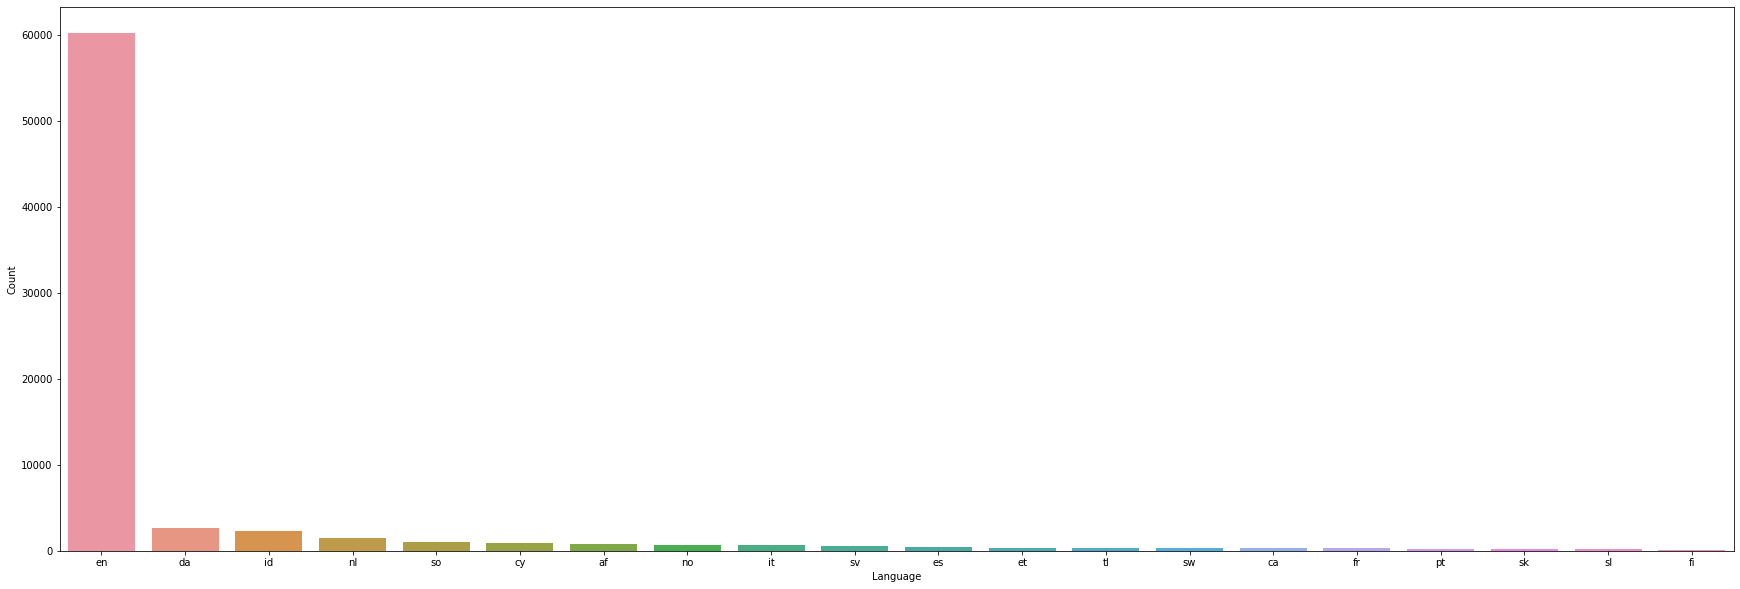

In [46]:
# Map showing the major language use in the tweets

b1 = nltk.FreqDist(language) 
e1 = pd.DataFrame({'Language': list(b1.keys()), 'Count': list(b1.values())}) 
# selecting top 20 most frequent hashtags 
e1 = e1.nlargest (columns="Count", n = 20) 
plt.figure(figsize=(30,10)) 
ax = sns.barplot(data=e1, x= "Language", y = "Count")